In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Задача 1
#### Даны значения зарплат из выборки выпускников: 
#### 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150
#### Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки. Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [118]:
salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [18]:
mean_salary = sum(salary) / len(salary)

In [19]:
var_biased = sum((salary - mean_salary)**2)/ len(salary)

In [20]:
var_unbiased = sum((salary - mean_salary)**2)/ (len(salary) - 1)

In [21]:
std_salary = np.sqrt(var_biased)

In [22]:
mean_salary,std_salary, var_biased, var_unbiased

(65.3, 30.823854398825596, 950.11, 1000.1157894736842)

In [24]:
salary.mean(), salary.std(), salary.var(), salary.var(ddof=1) # проверка

(65.3, 30.823854398825596, 950.11, 1000.1157894736842)

### Задача 2

#### Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [119]:
np.quantile(salary, [0.25, 0.75]) # первый и третий квартили

array([42., 81.])

In [120]:
np.quantile(salary, [0.25, 0.75])[1] - np.quantile(salary, [0.25, 0.75])[0] # интерквартильный размах

39.0

In [121]:
df_salary = pd.DataFrame(salary, columns=["amount"])

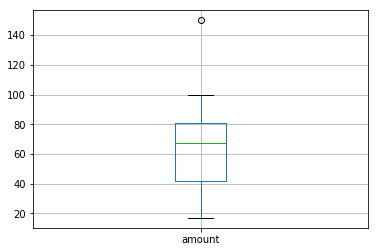

In [122]:
a = df_salary[["amount"]].boxplot(return_type ='dict')

In [93]:
a # посмотрим, какие объекты содержит ящик:

{'whiskers': [<matplotlib.lines.Line2D at 0x163ec18ac88>,
 'caps': [<matplotlib.lines.Line2D at 0x163ec197358>,
 'boxes': [<matplotlib.lines.Line2D at 0x163ec18a898>],
 'medians': [<matplotlib.lines.Line2D at 0x163ec1979e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x163ec197d30>],
 'means': []}

In [126]:
a['fliers'][0].get_ydata() # нам нужны выбросы, т.е. fliers:

array([150])

### Задача 3

#### В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C? Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### События: A - студент факультета А, B - студент факультета B, C - студент факультета C, Pass - сдал экзамен
$P(A)=\dfrac{1}{4}$, $P(B)=\dfrac{1}{4}$, $P(C)=\dfrac{1}{2} $

$P(Pass|A)=0.8$, $P(Pass|B)=0.7$, $P(Pass|C)=0.9 $
#### Полная вероятность того, что студент сдал сессию: 
$P(Pass) = P(A)P(Pass|A) + P(B)P(Pass|B) + P(C)P(Pass|C) = \dfrac{1}{4}\cdot0.8 + \dfrac{1}{4}\cdot0.7 + \dfrac{1}{2}\cdot0.9 = 0.825$
#### Искомые вероятности:
$P(A|Pass) = \dfrac {P(A)P(Pass|A)} {P(Pass)} =  \dfrac{\dfrac{1}{4}\cdot0.8}{0.825} \approx 0.24 $

$P(B|Pass) = \dfrac {P(B)P(Pass|B)} {P(Pass)} =  \dfrac{\dfrac{1}{4}\cdot0.7}{0.825} \approx 0.21$

$P(C|Pass) = \dfrac {P(C)P(Pass|C)} {P(Pass)} =  \dfrac{\dfrac{1}{2}\cdot0.9}{0.825} \approx 0.55$